# Diamond Price Prediction

In [1]:
#Importing basic modules
import numpy as np #Module for array
import pandas as pd #Module for loading dataset
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

print("Modules Loaded Successfully!")

Modules Loaded Successfully!


In [2]:
#Importing modules on fly
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
#Loading the dataset
df = pd.read_csv('diamonds.csv')

print("Dataset Loaded Successfully!")

Dataset Loaded Successfully!


In [4]:
#Checking the shape of the dataset
df.shape

(53940, 10)

In [5]:
#Checking the name of the columns
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [6]:
#Checking the first 5 rows of data
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
#Checking the data type of features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [8]:
#Chekcing the statistical info about the data
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [9]:
#Checking the unique values in each feature
df.apply(lambda x: len(x.unique()))

carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11602
x            554
y            552
z            375
dtype: int64

In [10]:
#Checking the null values in each feature
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [11]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [12]:
#Checking duplicate entries in dataset
df.duplicated().sum()

146

In [13]:
#Removing the duplicate entry
df.drop_duplicates(inplace=True)

In [14]:
#Checking if any dimension is zero
df.loc[(df['x']==0) | (df['y']==0) | (df['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [15]:
# Dropping Rows with Dimensions 'Zero'
df = df[(df[['x','y','z']] != 0).all(axis=1)]

In [16]:
#Checking dataset before moving to EDA
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Exploratory Data Analysis

<AxesSubplot:xlabel='carat', ylabel='Count'>

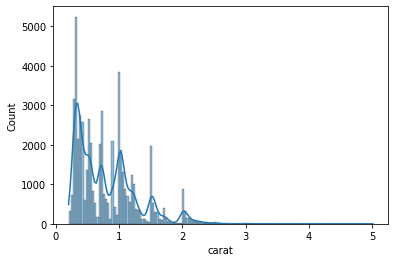

In [17]:
#Plotting carat feature
sns.histplot(df.carat, kde=True)

<AxesSubplot:xlabel='cut', ylabel='count'>

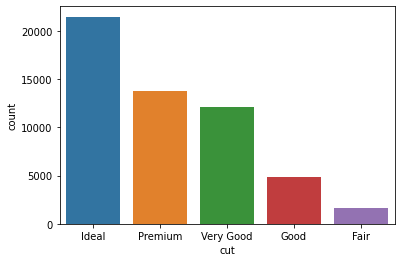

In [18]:
#Plotting countplot for cut feature
sns.countplot(df.cut, order=df.cut.value_counts().index)

<AxesSubplot:xlabel='color', ylabel='count'>

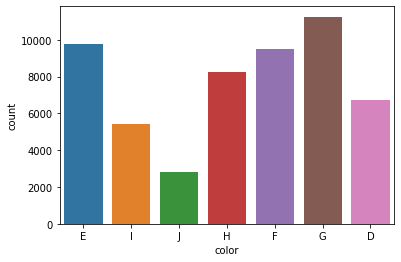

In [19]:
#Plotting countplot for color feature
sns.countplot(df.color)

<AxesSubplot:xlabel='clarity', ylabel='count'>

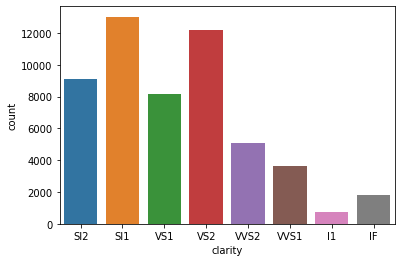

In [20]:
#Plotting countplot for clarity feature
sns.countplot(df.clarity)

<AxesSubplot:xlabel='depth', ylabel='Count'>

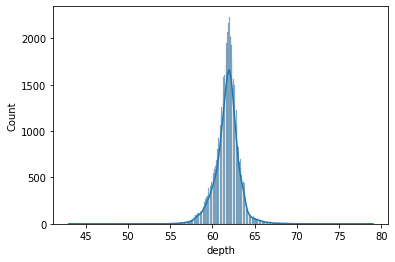

In [21]:
#Plotting depth feature
sns.histplot(df.depth, kde=True)

<AxesSubplot:xlabel='table', ylabel='Count'>

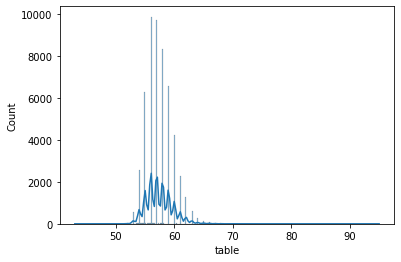

In [22]:
#Plotting table feature
sns.histplot(df.table, kde=True)

<AxesSubplot:xlabel='price', ylabel='Count'>

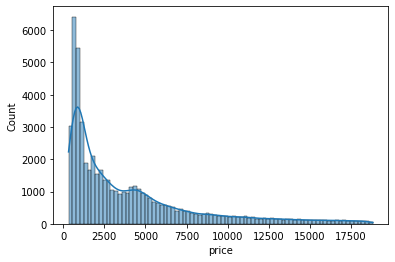

In [23]:
#Plotting price feature
sns.histplot(df.price, kde=True)

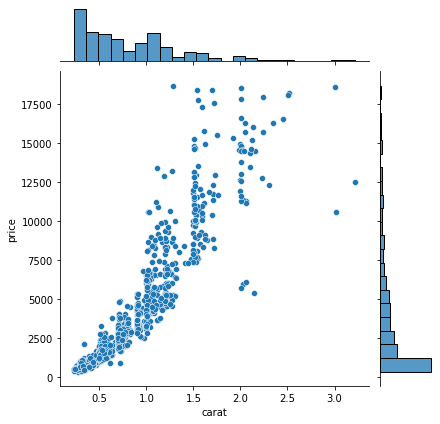

In [24]:
sns.jointplot('carat', 'price', data= df.sample(1000));

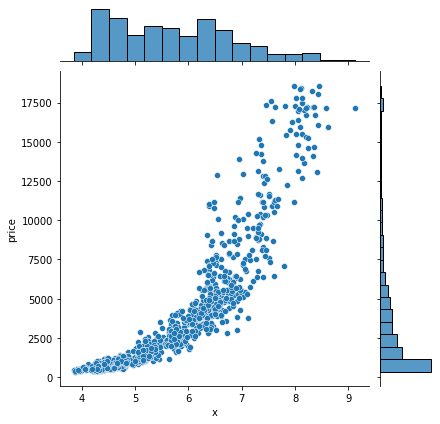

In [25]:
#Length Vs Price
sns.jointplot('x', 'price', data= df.sample(1000));

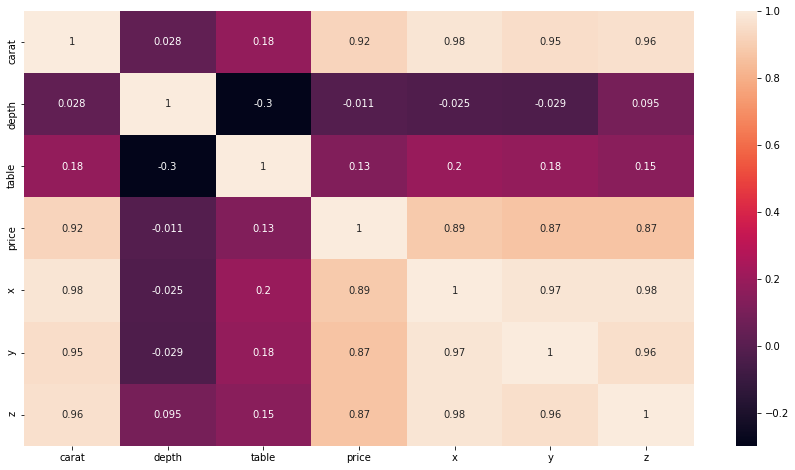

In [26]:
# Heatmap
corr = df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot= True)
plt.show()

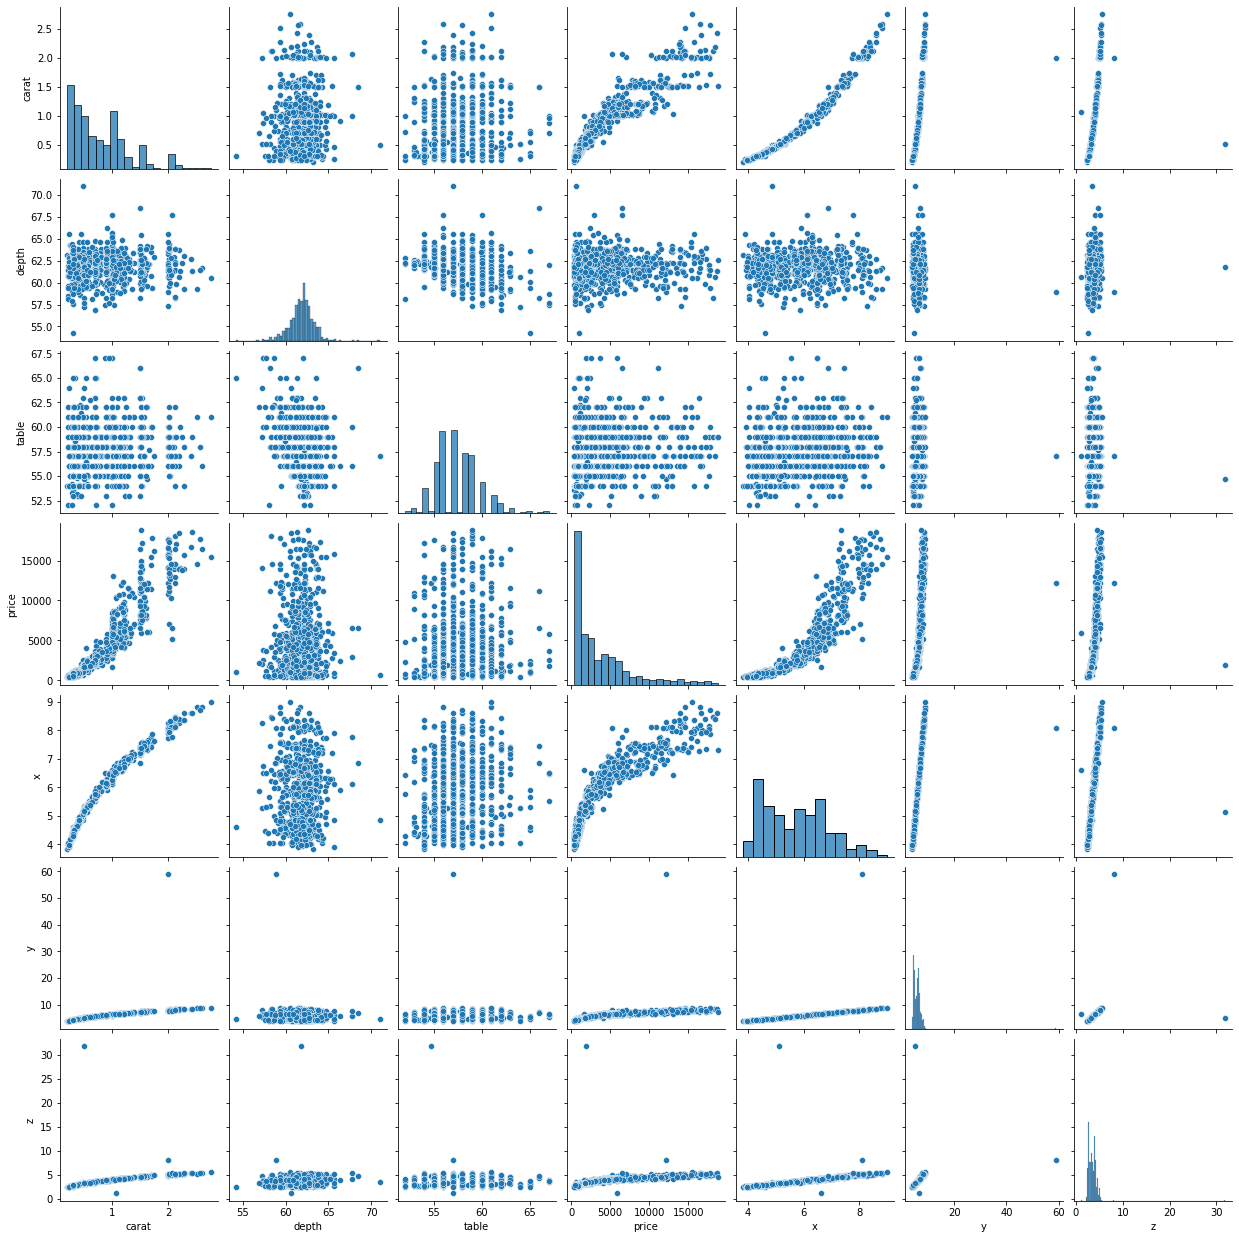

In [27]:
# Pair Plot 
sns.pairplot(df.sample(1000));

### Observations:

1. **The Price of the Diamond is highly correlated to Carat, and its Dimensions.**

2. **The Weight (Carat) of a diamond has the most significant impact on its Price.**

3. **The Length(x) , Width(y) and Height(z) seems to be higly related to Price and even each other.**

4. **Some other Inferences can also be drawn.**

## Pre-Processing

In [28]:
#Initialising Label Encoder and Standard Scaler
le = LabelEncoder()
sc = StandardScaler()

In [29]:
#Label Encoding
df["cut"]=le.fit_transform(df["cut"].astype('str'))
df["color"]=le.fit_transform(df["color"].astype('str'))
df["clarity"]=le.fit_transform(df["clarity"].astype('str'))

In [30]:
#Splitting the dataset in to input variables and output variable
X = df.drop('price', axis=1)
y = df['price']

In [31]:
#Splitting data in to training and test set
X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [32]:
#Normalising train and test sets
X_train['carat'] = sc.fit_transform(X_train[['carat']])
X_test['carat'] = sc.transform(X_test[['carat']])
X_train['depth'] = sc.fit_transform(X_train[['depth']])
X_test['depth'] = sc.transform(X_test[['depth']])
X_train['table'] = sc.fit_transform(X_train[['table']])
X_test['table'] = sc.transform(X_test[['table']])
X_train['x'] = sc.fit_transform(X_train[['x']])
X_test['x'] = sc.transform(X_test[['x']])
X_train['y'] = sc.fit_transform(X_train[['y']])
X_test['y'] = sc.transform(X_test[['y']])
X_train['z'] = sc.fit_transform(X_train[['z']])
X_test['z'] = sc.transform(X_test[['z']])

## Modelling

#### Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [34]:
y_pred = lr.predict(X_test)

In [35]:
print("R2 Score: ",round(r2_score(y_test, y_pred)*100,5))

R2 Score:  88.37637


#### KNN

In [36]:
#K Neighbors
sknn = KNeighborsRegressor()
sknn.fit(X_train, y_train)
y_pred = sknn.predict(X_test)

In [37]:
#Evaluation
print('Root Mean Squared Error: ',round(np.sqrt(mean_squared_error(y_test, y_pred)), 5))
print("R2 Score: ",round(r2_score(y_test, y_pred)*100,5))

Root Mean Squared Error:  744.65815
R2 Score:  96.45042


#### LGBM

In [38]:
import lightgbm as lgb
gbm = lgb.LGBMRegressor()
gbm.fit(X_train, y_train)

LGBMRegressor()

In [39]:
y_pred = gbm.predict(X_test)

In [40]:
#Evaluation
print('Root Mean Squared Error: ',round(np.sqrt(mean_squared_error(y_test, y_pred)), 5))
print("R2 Score: ",round(r2_score(y_test, y_pred)*100,5))

Root Mean Squared Error:  539.48135
R2 Score:  98.13699
